### Домашнее задание
Взять с прошлого домашнего задания ряд (в двух вариантах - стационарный и нет) и приблизить оба эти варианта моделями из класса MA. Оценить качество и прислать соображения почему была выбрана та или иная модель

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from datetime import datetime
from tqdm.notebook import tqdm
%matplotlib inline

In [2]:
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

In [5]:
all_series = {
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

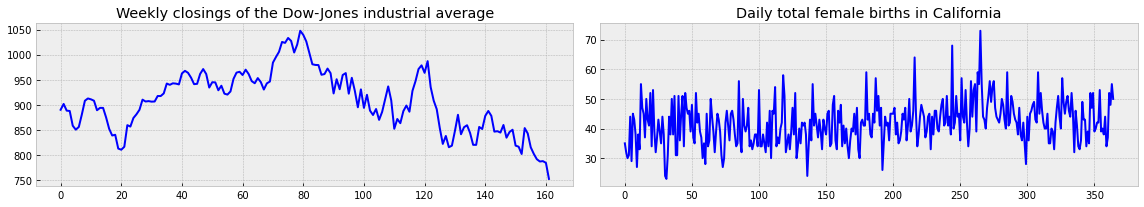

In [6]:
with plt.style.context('bmh'):
    plt.figure(figsize = (16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax = ts_ax, color = 'blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

In [9]:
dowjones_closing_Close = dowjones_closing["Close"]
female_births_Count = female_births["Count"]

In [ ]:
# Пройду по всем методам

### Moving Average Скользящее среднее

In [8]:
def moving_average(series, n):
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    return series.rolling(n).mean()

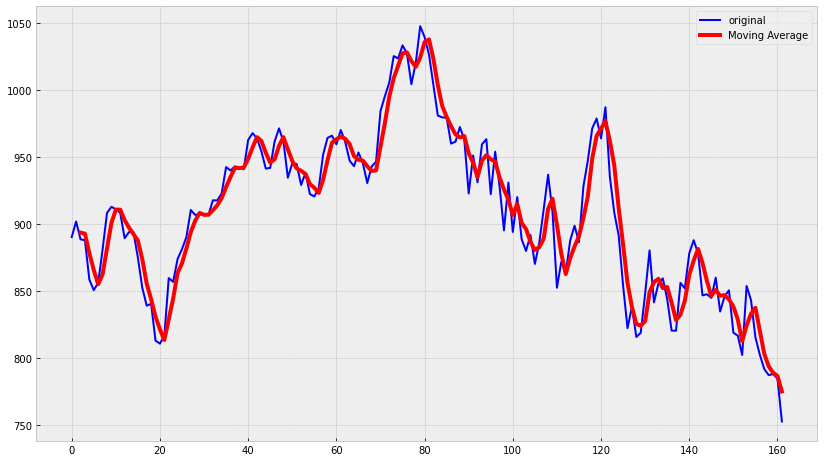

In [18]:
# dowjones_closing_Close = dowjones_closing["Close"]
ser = moving_average(dowjones_closing_Close, 3)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(dowjones_closing_Close, color='blue',label='original')
    plt.plot(ser, color='red', linewidth='4', label='Moving Average')
    plt.legend()

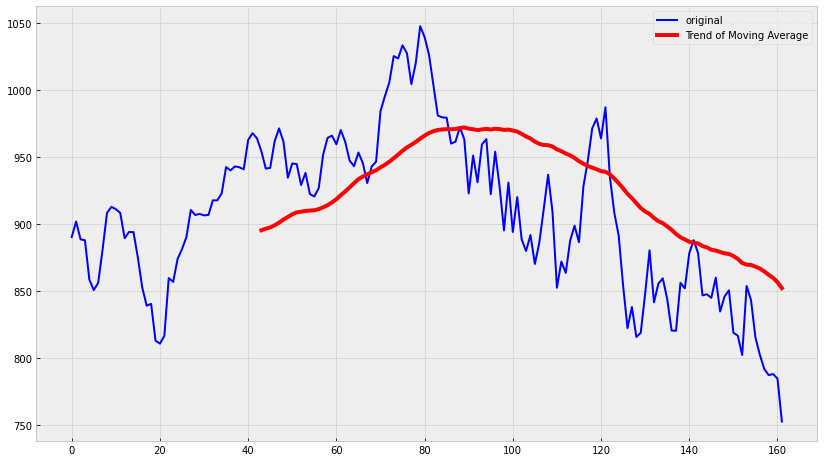

In [28]:
# смотрю как MA помогает определить тренд

ts = dowjones_closing_Close
ser = moving_average(ts, 44)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(ts, color='blue',label='original')
    plt.plot(ser, color='red', linewidth='4', label='Trend of Moving Average')
    plt.legend()

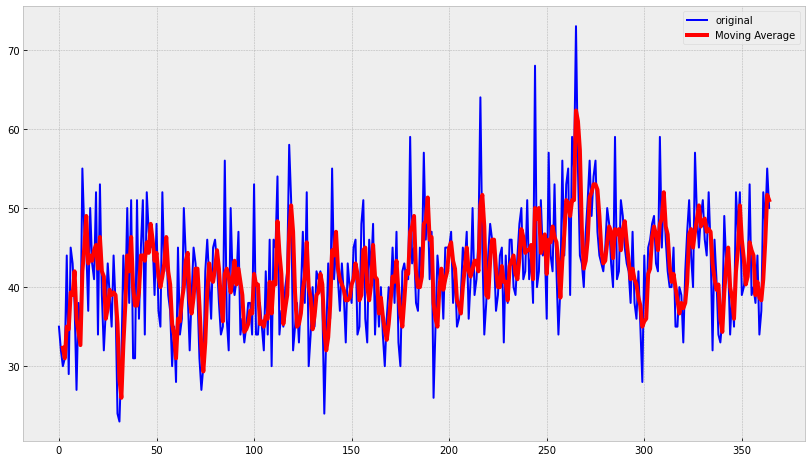

In [27]:
ser_1 = moving_average(female_births_Count, 3)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(female_births_Count, color='blue',label='original')
    plt.plot(ser_1, color='red', linewidth='4', label='Moving Average')
    plt.legend()

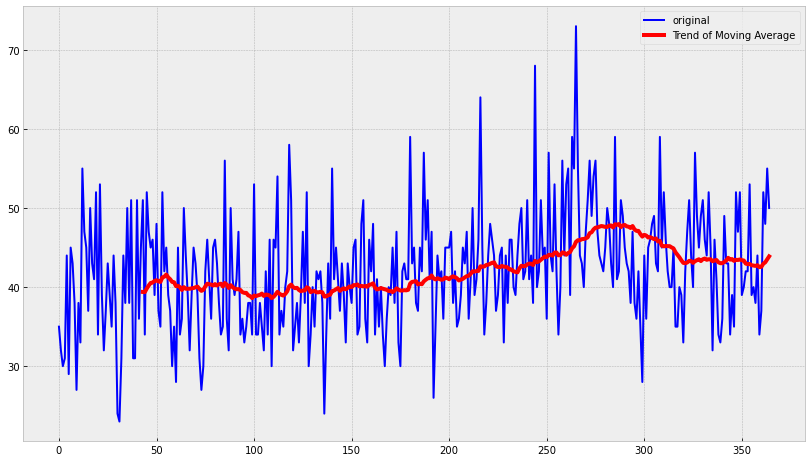

In [29]:
ts_1 = female_births_Count
ser_1 = moving_average(ts_1, 44)
with plt.style.context('bmh'):
    plt.figure(figsize = (14, 8))
    plt.plot(ts_1, color = 'blue',label = 'original')
    plt.plot(ser_1, color = 'red', linewidth = '4', label = 'Trend of Moving Average')
    plt.legend()

### Weighted МА (WMA) / Взвешенное скользящее среднее
Учитывает временной контекст.   
Чем раньше было событие - тем меньше оно влияет на прогнозируемое событие

In [31]:
def weighted_moving_average(series, n, weights):
    if not isinstance(weights, np.ndarray):
        weights = np.array(weights)
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    wma = series.rolling(n).apply(lambda s: (s * weights).sum() / weights.sum(), raw=True)
    return wma

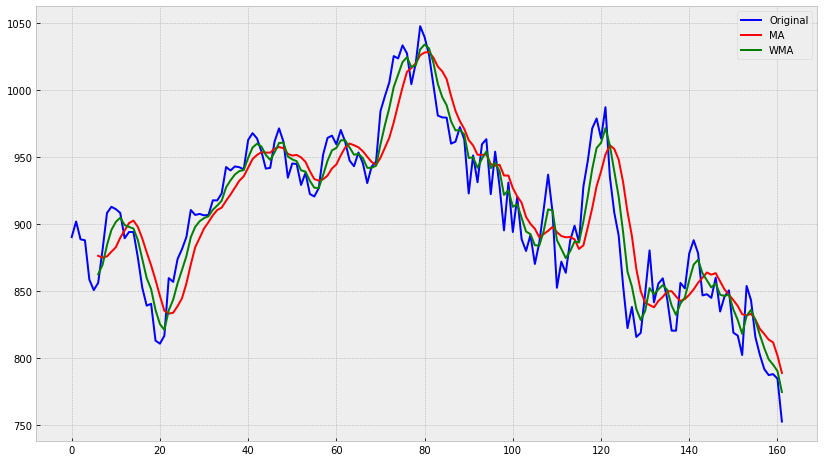

In [38]:
wma = weighted_moving_average(dowjones_closing_Close, 7, [1,1,2,3,5,8,13])
ma = moving_average(dowjones_closing_Close, 7)
with plt.style.context('bmh'):
    plt.figure(figsize = (14, 8))
    plt.plot(dowjones_closing_Close, color = 'blue',label = 'Original')
    plt.plot(ma, color = 'red', linewidth = '2', label = 'MA')
    plt.plot(wma, color = 'g', linewidth = '2', label = 'WMA')
    plt.legend()

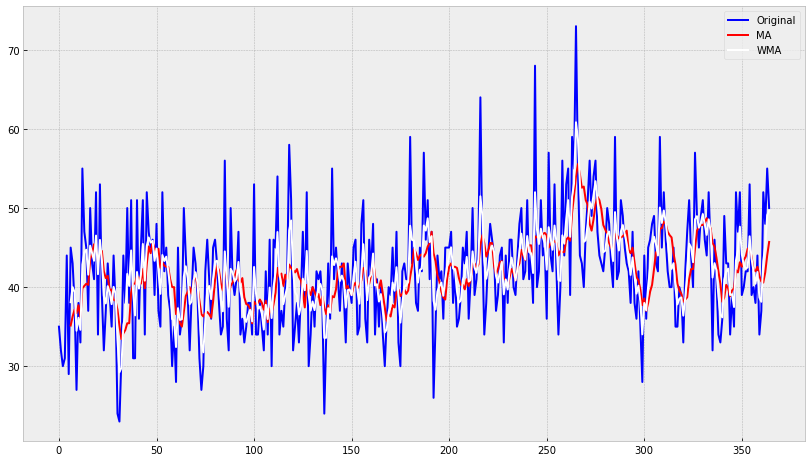

In [40]:
wma_1 = weighted_moving_average(female_births_Count, 7, [1,1,2,3,5,8,13])
ma_1 = moving_average(female_births_Count, 7)
with plt.style.context('bmh'):
    plt.figure(figsize = (14, 8))
    plt.plot(female_births_Count, color = 'blue',label = 'Original')
    plt.plot(ma_1, color = 'red', linewidth = '2', label = 'MA')
    plt.plot(wma_1, color = 'w', linewidth = '2', label = 'WMA')
    plt.legend()

In [ ]:
# wma более приближена к реальным данным согласно графикам

### Exponential Moving Average(EMA) / Экспоненциальное сглаживание
 это взвешеное среднее между последним наблюдением и предыдущей историей

In [41]:
def exponential_moving_average(series, alpha):
    result = [series[0]]
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return pd.Series(result)

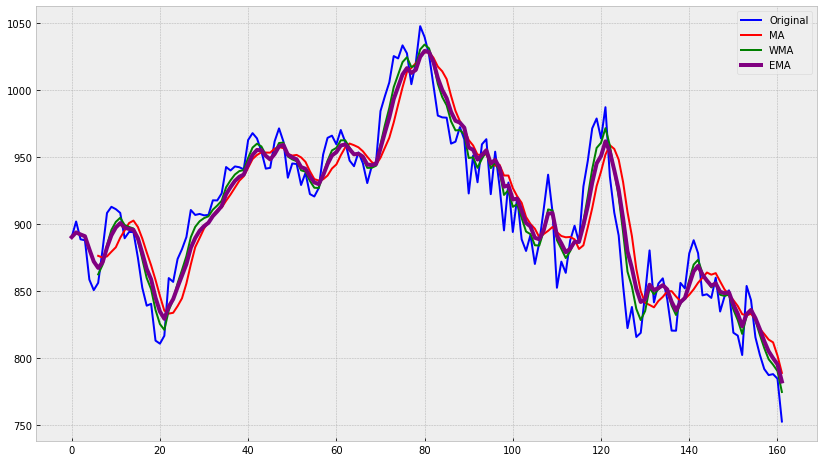

In [43]:
ema = exponential_moving_average(dowjones_closing_Close, 0.3)
wma = weighted_moving_average(dowjones_closing_Close, 7, [1,1,2,3,5,8,13])
ma = moving_average(dowjones_closing_Close, 7)
with plt.style.context('bmh'):
    plt.figure(figsize = (14, 8))
    plt.plot(dowjones_closing_Close, color = 'blue',label = 'Original')
    plt.plot(ma, color = 'red', linewidth = '2', label = 'MA')
    plt.plot(wma, color = 'green', linewidth = '2', label = 'WMA')
    plt.plot(ema, color = 'purple', linewidth = '4', label = 'EMA')
    plt.legend()

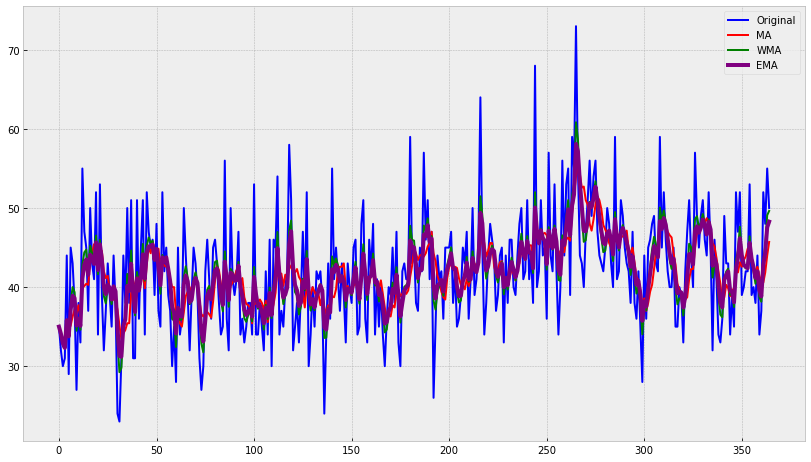

In [44]:
ema = exponential_moving_average(female_births_Count, 0.3)
wma = weighted_moving_average(female_births_Count, 7, [1,1,2,3,5,8,13])
ma = moving_average(female_births_Count, 7)
with plt.style.context('bmh'):
    plt.figure(figsize = (14, 8))
    plt.plot(female_births_Count, color = 'blue',label = 'Original')
    plt.plot(ma, color = 'red', linewidth = '2', label = 'MA')
    plt.plot(wma, color = 'green', linewidth = '2', label = 'WMA')
    plt.plot(ema, color = 'purple', linewidth = '4', label = 'EMA')
    plt.legend()

### Double EMA(DEMA) / Двойное экспоненциальное сглаживание
Это сумма $l_t$ (уровня) и $s_t$ (тренда).    
 Фактически: тренд - это основное направление движения ряда, а уровень - колебание вокруг этого тренда.

In [47]:
def double_ema(series, alpha, beta):
    result = [series[0]]
    level, trend = series[0], series[1] - series[0]
    for n in range(1, len(series)):
        value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level + trend)
        trend = beta*(level - last_level) + (1 - beta)*trend
        result.append(level + trend)
    return pd.Series(result)

In [49]:
def plot_dema(alpha, beta):
    dema = double_ema(dowjones_closing_Close, alpha, beta)
    with plt.style.context('bmh'):
        plt.figure(figsize = (14, 8))
        plt.plot(dowjones_closing_Close, color = 'blue',label = 'Original')
        plt.plot(dema, color = 'red', linewidth = '4', label = 'DEMA')
        plt.title("alpha = {}, beta = {}".format(alpha, beta))
        plt.legend()

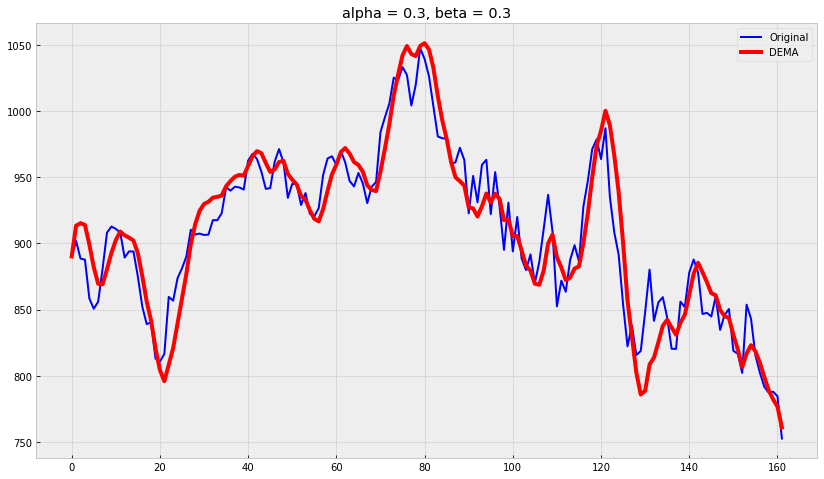

In [53]:
plot_dema(0.3, 0.3)

In [54]:
def plot_dema(alpha, beta):
    dema = double_ema(female_births_Count, alpha, beta)
    with plt.style.context('bmh'):
        plt.figure(figsize = (14, 8))
        plt.plot(female_births_Count, color = 'blue',label = 'Original')
        plt.plot(dema, color = 'red', linewidth = '4', label = 'DEMA')
        plt.title("alpha = {}, beta = {}".format(alpha, beta))
        plt.legend()

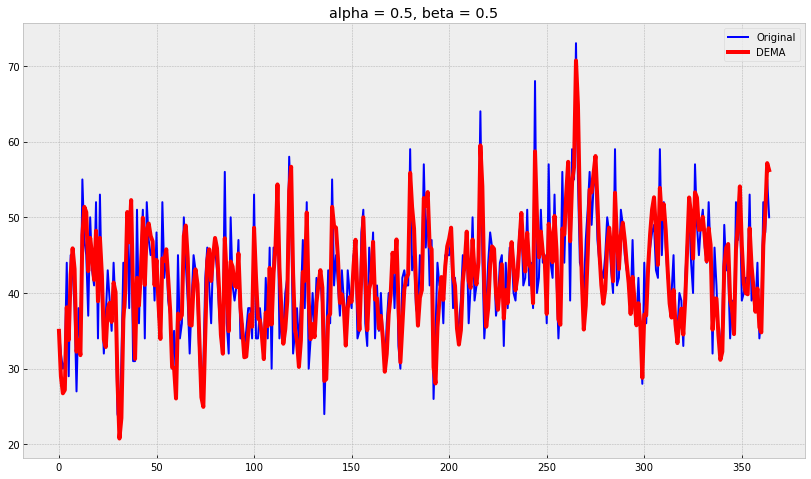

In [59]:
plot_dema(0.5, 0.5)

### Triple EMA(TEMA) / Тройное экспоненциальное сглаживание
Метод Хольта Винтерса   
Начинаем учитывать сезонность,которая учитывается в виде третьей компоненты.  
Сезонная компонента   $p_t$   объясняет повторяющиеся колебания вокруг уровня и тренда; ее параметр - период, после которого начинаются повторения колебаний. Для каждого наблюдения в сезоне формируется своя компонента.

In [60]:
def initial_trend(series, season_len):
    return sum([float(series[i + season_len] - series[i]) / season_len]) / season_len

In [61]:
def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j + i] - season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

In [62]:
def triple_exponential_smoothing(series, slen, alpha, beta, gamma, n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series) + n_preds):
        if i == 0: # initial values
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series): # we are forecasting
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val - seasonals[i%slen]) + (1 - alpha)*(smooth + trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val - smooth) + (1 - gamma)*seasonals[i%slen]
            result.append(smooth + trend + seasonals[i%slen])
    return result

In [63]:
def plot_tema(alpha, beta, gamma, ser = dowjones_closing_Close, ser_to_plot = dowjones_closing_Close, n_preds = 24):
    tema = triple_exponential_smoothing(ser, 12, alpha, beta, gamma, n_preds)
    with plt.style.context('bmh'):
        plt.figure(figsize = (14, 8))
        plt.plot(ser_to_plot, color = 'blue',label='Original')
        plt.plot(tema, color = 'red', linewidth = '4', label = 'TEMA')
        plt.title("alpha = {}, beta = {}, gamma = {}".format(alpha, beta, gamma))
        plt.legend()

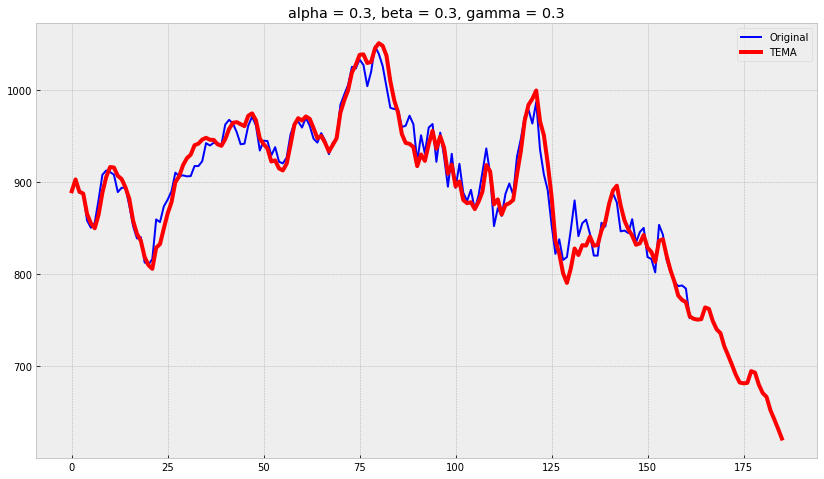

In [64]:
plot_tema(0.3, 0.3, 0.3)

In [65]:
def plot_tema(alpha, beta, gamma, ser = female_births_Count, ser_to_plot = female_births_Count, n_preds = 24):
    tema = triple_exponential_smoothing(ser, 12, alpha, beta, gamma, n_preds)
    with plt.style.context('bmh'):
        plt.figure(figsize = (14, 8))
        plt.plot(ser_to_plot, color = 'blue',label='Original')
        plt.plot(tema, color = 'red', linewidth = '4', label = 'TEMA')
        plt.title("alpha = {}, beta = {}, gamma = {}".format(alpha, beta, gamma))
        plt.legend()

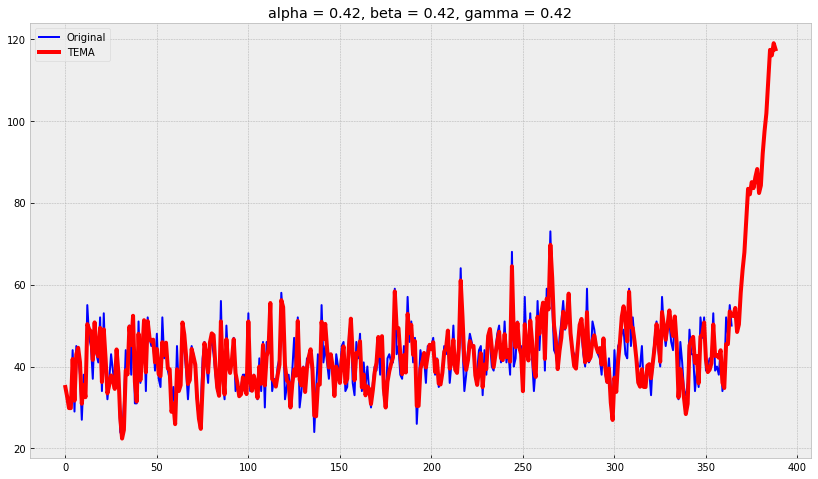

In [69]:
plot_tema(0.42, 0.42, 0.42)

In [70]:
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

In [71]:
# подбор параметров модели

In [93]:
series =  dowjones_closing["Close"]
# series = female_births["Count"]

In [94]:
train, test, val = series[:60], series[60:70], series[70:]

In [96]:
def mse(X):
    alpha, beta, gamma = X
    result = triple_exponential_smoothing(train, 12, alpha, beta, gamma, len(test))
    predictions = result[-len(test):]
    error = mean_squared_error(predictions, test)
    return error

In [97]:
opt = minimize(mse, x0 = [0,0,0], method = "L-BFGS-B", bounds = ((0, 1), (0, 1), (0, 1)))

In [98]:
alpha_opt, beta_opt, gamma_opt = opt.x
print(opt)

      fun: 52.343412970613976
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.09423581e-04,  4.61852778e-05, -1.15818466e-04])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 148
      nit: 20
     njev: 37
   status: 0
  success: True
        x: array([0.36859463, 0.01155607, 0.38615184])


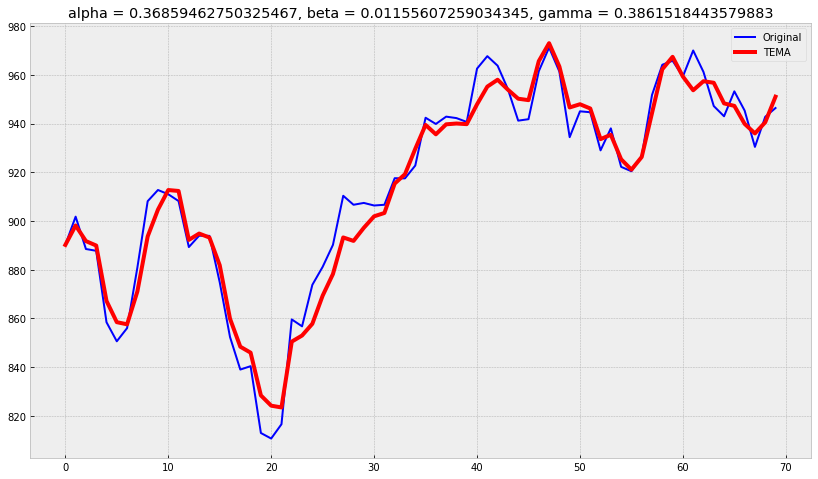

In [83]:
plot_tema(alpha_opt, beta_opt, gamma_opt, ser = train, ser_to_plot = series[:70], n_preds = len(test))